In [ ]:
#Projeto: Qual melhor ativo a investir com R$100,00? 

#Esta análise também serve para valores mais expressivos
#Buscar Retorno Histórico 
#Buscar Risco Histórico
#Buscar Retorno Ajustado ao Risco (índice Sharpe) 

In [ ]:
#Ativos analisados: IBOV, S&P500, QQQ, IFIX, Small Caps BR, CDI, IDIV, SPHD, OURO, Bitcoin

In [ ]:
#Fonte de Dados
#Yahoo Finance: BTC, IBOV, SP500, SPHD, GLD, QQQ
#VAROS: IFIX, Small Caps BR, IDIV
#Banco Central: CDI, PTAX

In [183]:
!pip install yfinance

In [184]:
!pip install python-bcb

In [185]:
#Passo 1: Importar bibliotecas

In [186]:
import pandas as pd
import yfinance as yf
from bcb import sgs
from bcb import currency 
import datetime 
import numpy as np

In [187]:
#Passo 2: Buscar os dados do dólar

In [188]:
cotacao_do_dolar = currency.get({"USD":1}, start = datetime.datetime(2014, 9, 17), end = datetime.datetime.now())

cotacao_do_dolar

,USD
Date,
2014-09-17,2.3384
2014-09-18,2.3668
2014-09-19,2.3656
2014-09-22,2.3870
2014-09-23,2.4026
...,...
2024-10-02,5.4305
2024-10-03,5.4850
2024-10-04,5.4686


In [189]:
#Passo 3: Buscar os dados do Yahoo Finance

In [190]:
dados_yahoo_finance = yf.download(["^BVSP", "^GSPC", "SPHD", "GLD", "BTC-USD", "QQQ"], end = "2024-10-01")["Adj Close"]
dados_yahoo_finance = dados_yahoo_finance.dropna()

dados_yahoo_finance

[*********************100%%**********************]  6 of 6 completed


Ticker,BTC-USD,GLD,QQQ,SPHD,^BVSP,^GSPC
Date,,,,,,
2014-09-17,457.334015,117.540001,91.697250,20.963417,59108.0,2001.569946
2014-09-18,424.440002,117.779999,92.388252,20.997274,58374.0,2011.359985
2014-09-19,394.795990,117.089996,92.330994,21.044708,57789.0,2010.400024
2014-09-22,402.152008,116.849998,91.472153,20.983749,56818.0,1994.290039
2014-09-23,435.790985,117.599998,91.222794,20.855043,56541.0,1982.770020
...,...,...,...,...,...,...
2024-09-24,64301.968750,246.070007,485.369995,50.299999,132156.0,5732.930176
2024-09-25,63143.144531,245.729996,485.820007,50.009998,131586.0,5722.259766
2024-09-26,65181.019531,246.979996,489.470001,50.080002,133010.0,5745.370117


In [191]:
#Passo 4: Transformar ativos "dolarizados" para Real

In [192]:
for ativo in dados_yahoo_finance.columns: 

    if ativo == '^BVSP': 
        pass
    else:
        
        dados_yahoo_finance[ativo] = dados_yahoo_finance[ativo] * cotacao_do_dolar["USD"]

dados_yahoo_finance.columns = dados_yahoo_finance.columns.str.replace('BTC-USD', 'BTC-BRL')

dados_yahoo_finance

Ticker,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC
Date,,,,,,
2014-09-17,1069.429860,274.855538,214.424850,49.020854,59108.0,4680.471162
2014-09-18,1004.564598,278.761701,218.664515,49.696349,58374.0,4760.486813
2014-09-19,933.929394,276.988095,218.418199,49.783362,57789.0,4755.802298
2014-09-22,959.936843,278.920946,218.344029,50.088210,56818.0,4760.370323
2014-09-23,1047.031421,282.545756,219.171884,50.106327,56541.0,4763.803249
...,...,...,...,...,...,...
2024-09-24,351744.629456,1346.052154,2655.070947,275.151056,132156.0,31360.274648
2024-09-25,345620.315906,1345.027705,2659.184392,273.734727,131586.0,31321.361053
2024-09-26,354662.963473,1343.867553,2663.304171,272.495306,133010.0,31261.707882


In [193]:
#Passo 5: Agora é calcular os retornos diários dos ativos do Yfinance

In [194]:
dados_yahoo_finance = dados_yahoo_finance.pct_change().dropna()

dados_yahoo_finance

Ticker,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC
Date,,,,,,
2014-09-18,-0.060654,0.014212,0.019772,0.013780,-0.012418,0.017096
2014-09-19,-0.070314,-0.006362,-0.001126,0.001751,-0.010022,-0.000984
2014-09-22,0.027847,0.006978,-0.000340,0.006123,-0.016803,0.000961
2014-09-23,0.090729,0.012996,0.003792,0.000362,-0.004875,0.000721
2014-09-24,-0.027102,-0.002854,0.012582,0.006062,0.005005,0.009678
...,...,...,...,...,...,...
2024-09-24,0.001726,0.000363,-0.008660,-0.012240,0.012162,-0.010941
2024-09-25,-0.017411,-0.000761,0.001549,-0.005147,-0.004313,-0.001241
2024-09-26,0.026164,-0.000863,0.001549,-0.004528,0.010822,-0.001905


In [195]:
#Passo 6: Buscar dados de índices fornecidos pela VAROS

In [196]:
dados_indices = pd.read_csv("dados_indices_base_varos.csv", index_col = "data") 
dados_indices.index = pd.to_datetime(dados_indices.index)

dados_indices

,IFIX,SMLL,IDIV
data,,,
2014-09-18,0.001491,-0.006742,-0.011315
2014-09-19,-0.003848,-0.001037,-0.012357
2014-09-22,-0.001248,-0.022493,-0.023075
2014-09-23,0.001461,-0.001266,-0.004856
2014-09-24,0.000324,0.002200,0.002070
...,...,...,...
2024-09-24,-0.002548,0.011052,0.011815
2024-09-25,-0.002967,-0.011486,-0.002466
2024-09-26,0.000124,0.004420,0.013115


In [197]:
# Passo 7: Buscar o retorno do CDI do Banco Central

In [198]:
rendimento_cdi = sgs.get({"CDI": 12}, start = datetime.datetime(2014, 9, 18))

rendimento_cdi = rendimento_cdi/100 

rendimento_cdi

,CDI
Date,
2014-09-18,0.000407
2014-09-19,0.000407
2014-09-22,0.000407
2014-09-23,0.000408
2014-09-24,0.000408
...,...
2024-10-01,0.000402
2024-10-02,0.000402
2024-10-03,0.000402


In [199]:
#Passo 8: Juntando todos os dados de retorno

In [200]:
dados_totais = dados_yahoo_finance.join(dados_indices) 
dados_totais = dados_totais.join(rendimento_cdi)

dados_totais

,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC,IFIX,SMLL,IDIV,CDI
Date,,,,,,,,,,
2014-09-18,-0.060654,0.014212,0.019772,0.013780,-0.012418,0.017096,0.001491,-0.006742,-0.011315,0.000407
2014-09-19,-0.070314,-0.006362,-0.001126,0.001751,-0.010022,-0.000984,-0.003848,-0.001037,-0.012357,0.000407
2014-09-22,0.027847,0.006978,-0.000340,0.006123,-0.016803,0.000961,-0.001248,-0.022493,-0.023075,0.000407
2014-09-23,0.090729,0.012996,0.003792,0.000362,-0.004875,0.000721,0.001461,-0.001266,-0.004856,0.000408
2014-09-24,-0.027102,-0.002854,0.012582,0.006062,0.005005,0.009678,0.000324,0.002200,0.002070,0.000408
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,0.001726,0.000363,-0.008660,-0.012240,0.012162,-0.010941,-0.002548,0.011052,0.011815,0.000402
2024-09-25,-0.017411,-0.000761,0.001549,-0.005147,-0.004313,-0.001241,-0.002967,-0.011486,-0.002466,0.000402
2024-09-26,0.026164,-0.000863,0.001549,-0.004528,0.010822,-0.001905,0.000124,0.004420,0.013115,0.000402


In [201]:
#Passo 9: Calcular a volatilidade histórica

In [202]:
vol_historica = dados_totais.std() * np.sqrt(252)

vol_historica.sort_values(ascending = False)

BTC-BRL    0.716873
SMLL       0.255093
QQQ        0.249634
^BVSP      0.248089
IDIV       0.237574
^GSPC      0.212047
SPHD       0.204706
GLD        0.199390
IFIX       0.083638
CDI        0.002365
dtype: float64

In [203]:
#Passo 10: Calcular o retorno histórico (acumulado e ao ano)

In [204]:
retorno_acumulado = (1 + dados_totais).cumprod() - 1
retorno_acumulado = retorno_acumulado.iloc[-1, :]

retorno_acumulado

BTC-BRL    321.625599
GLD          3.817859
QQQ         11.400868
SPHD         4.620270
^BVSP        1.230087
^GSPC        5.707566
IFIX         1.249158
SMLL         0.416085
IDIV         1.311450
CDI          1.351463
Name: 2024-09-30 00:00:00, dtype: float64

In [205]:
investiu_100_reais = (1 + dados_totais).cumprod() * 100
investiu_100_reais

,BTC-BRL,GLD,QQQ,SPHD,^BVSP,^GSPC,IFIX,SMLL,IDIV,CDI
Date,,,,,,,,,,
2014-09-18,93.934594,101.421169,101.977227,101.377974,98.758205,101.709564,100.149084,99.325780,98.868517,100.040741
2014-09-19,87.329654,100.775883,101.862353,101.555476,97.768492,101.609478,99.763716,99.222786,97.646811,100.081499
2014-09-22,89.761552,101.479107,101.827763,102.177350,96.125736,101.707075,99.639246,96.990968,95.393605,100.122273
2014-09-23,97.905572,102.797913,102.213845,102.214308,95.657102,101.780421,99.784813,96.868167,94.930354,100.163172
2014-09-24,95.252100,102.504523,103.499875,102.833889,96.135887,102.765471,99.817162,97.081287,95.126893,100.204087
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,32890.855443,489.730774,1238.229125,561.293880,223.583948,670.023883,224.749831,143.112168,230.292713,234.768831
2024-09-25,32318.184548,489.358051,1240.147487,558.404642,222.619612,669.192480,224.083105,141.468379,229.724829,234.863133
2024-09-26,33163.742345,488.935956,1242.068803,555.876288,225.028761,667.917968,224.110999,142.093688,232.737744,234.957473


In [206]:
#retorno ao ano
#1 ano = 252 dias úteis

numero_de_dias = len(dados_totais)

retorno_ao_ano = (1 + retorno_acumulado) ** (252/numero_de_dias) - 1 

retorno_ao_ano

BTC-BRL    0.822176
GLD        0.177420
QQQ        0.298919
SPHD       0.196412
^BVSP      0.086881
^GSPC      0.218594
IFIX       0.087842
SMLL       0.036798
IDIV       0.090934
CDI        0.092880
Name: 2024-09-30 00:00:00, dtype: float64

In [207]:
#Passo 11: Calcular o retorno ajustado ao risco

In [208]:
sharpe = retorno_ao_ano/vol_historica 

sharpe

BTC-BRL     1.146892
GLD         0.889810
QQQ         1.197430
SPHD        0.959484
^BVSP       0.350200
^GSPC       1.030876
IFIX        1.050268
SMLL        0.144255
IDIV        0.382760
CDI        39.267028
dtype: float64

In [209]:
#Passo 12: Visualizar resultados finais

In [210]:
tabela_final = pd.concat([retorno_ao_ano, vol_historica, sharpe], axis = 1)
tabela_final.columns = ["Retorno a.a.", "Volatilidado a.a.", "Indice Sharpe"]
tabela_final.index = ["BITCOIN", "OURO", "QQQ", "DIVIDENDOS US", "IBOV", "S&P500", "IFIX", "SMALL CAPS BR", "IDIV", "CDI"] 

tabela_final = tabela_final.sort_values("Retorno a.a.", ascending = False) 

tabela_final

,Retorno a.a.,Volatilidado a.a.,Indice Sharpe
BITCOIN,0.822176,0.716873,1.146892
QQQ,0.298919,0.249634,1.197430
S&P500,0.218594,0.212047,1.030876
DIVIDENDOS US,0.196412,0.204706,0.959484
OURO,0.177420,0.199390,0.889810
CDI,0.092880,0.002365,39.267028
IDIV,0.090934,0.237574,0.382760
IFIX,0.087842,0.083638,1.050268
IBOV,0.086881,0.248089,0.350200
SMALL CAPS BR,0.036798,0.255093,0.144255


In [211]:
df_no_estilo = tabela_final.style.format(
    {
        "Retorno a.a.": '{:.2%}', 
        "Volatilidade a.a.": '{:.2%}'
    }) 

df_no_estilo

,Retorno a.a.,Volatilidado a.a.,Indice Sharpe
BITCOIN,82.22%,0.716873,1.146892
QQQ,29.89%,0.249634,1.197430
S&P500,21.86%,0.212047,1.030876
DIVIDENDOS US,19.64%,0.204706,0.959484
OURO,17.74%,0.199390,0.889810
CDI,9.29%,0.002365,39.267028
IDIV,9.09%,0.237574,0.382760
IFIX,8.78%,0.083638,1.050268
IBOV,8.69%,0.248089,0.350200
SMALL CAPS BR,3.68%,0.255093,0.144255


In [212]:
!pip install mplcyberpunk

<Axes: xlabel='Date'>

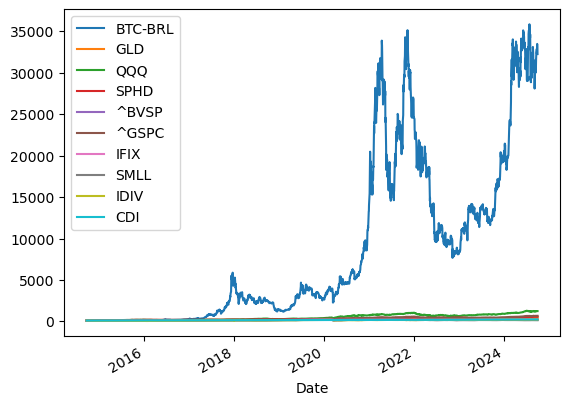

In [213]:
investiu_100_reais.plot()

<Axes: xlabel='Date'>

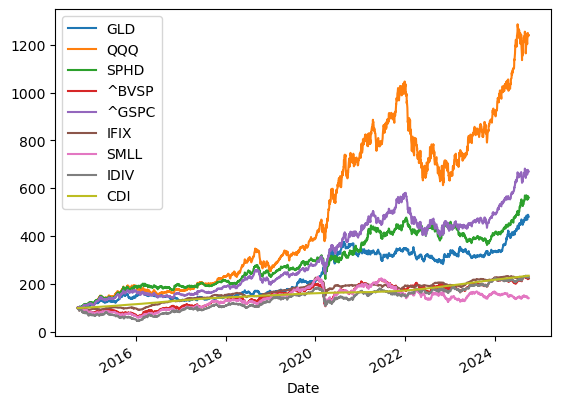

In [214]:
investiu_100_reais_ex_btc = investiu_100_reais.drop("BTC-BRL", axis = 1)

investiu_100_reais_ex_btc.plot()